# MATPLOTLIB LEARNING NOTES

> CREATE DATE : 02.03.2023

> AUTHOR : BURAK YILMAZ



##  **TABLE OF CONTENTS**

1. CUSTOM FONTS AND THEMES
1. BAR CHART
1. LINE CHART
1. PIE CHART
1. SCATTER PLOT
1. HISTOGRAM




In [8]:
# import statements

import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager



EXAMPLE DATA

In [94]:
# run this example data for the graphs

data_url = 'http://bit.ly/2cLzoxH'
df = pd.read_csv(data_url)


In [93]:
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


 ### 1) CUSTOM FONTS AND THEMES

In [4]:
# different fonts. customise the color and the size and the location
 
font1  = {'family':'serif','color':'black','size':20}
font2  = {'family':'verdana','color':'black','size':20} 
font3  = {'family':'Segoe Print','color':'blue','size':20} # informal
font4  = {'family':'Arial Rounded MT Bold','color':'blue','size':20}
font5  = {'family':'Calibri','color':'blue','size':20}
font6  = {'family':'Times New Roman','color':'blue','size':20}
font7  = {'family':'Tahoma','color':'blue','size':20}
font8  = {'family':'Microsoft Sans Serif','color':'blue','size':20}
font9  = {'family':'Segoe UI','color':'blue','size':20}
font10_ = {'family':'Perpetua','color':'blue','size':40}
font11 = {'family':'Candara','color':'blue','size':20}
font13 = {'family':'Corbel','color':'blue','size':20}


In [ ]:
 # run to see available font names in matplotlib: 
fpaths = font_manager.findSystemFonts()

fontlist = []

for i in fpaths:
    f = font_manager.get_font(i)
    fontlist.append(f.family_name)

    
fontlist = list(dict.fromkeys(fontlist))    
fontlist.sort()    
    
for font in fontlist:
    print(font)



[Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

 ### 2) BAR CHART

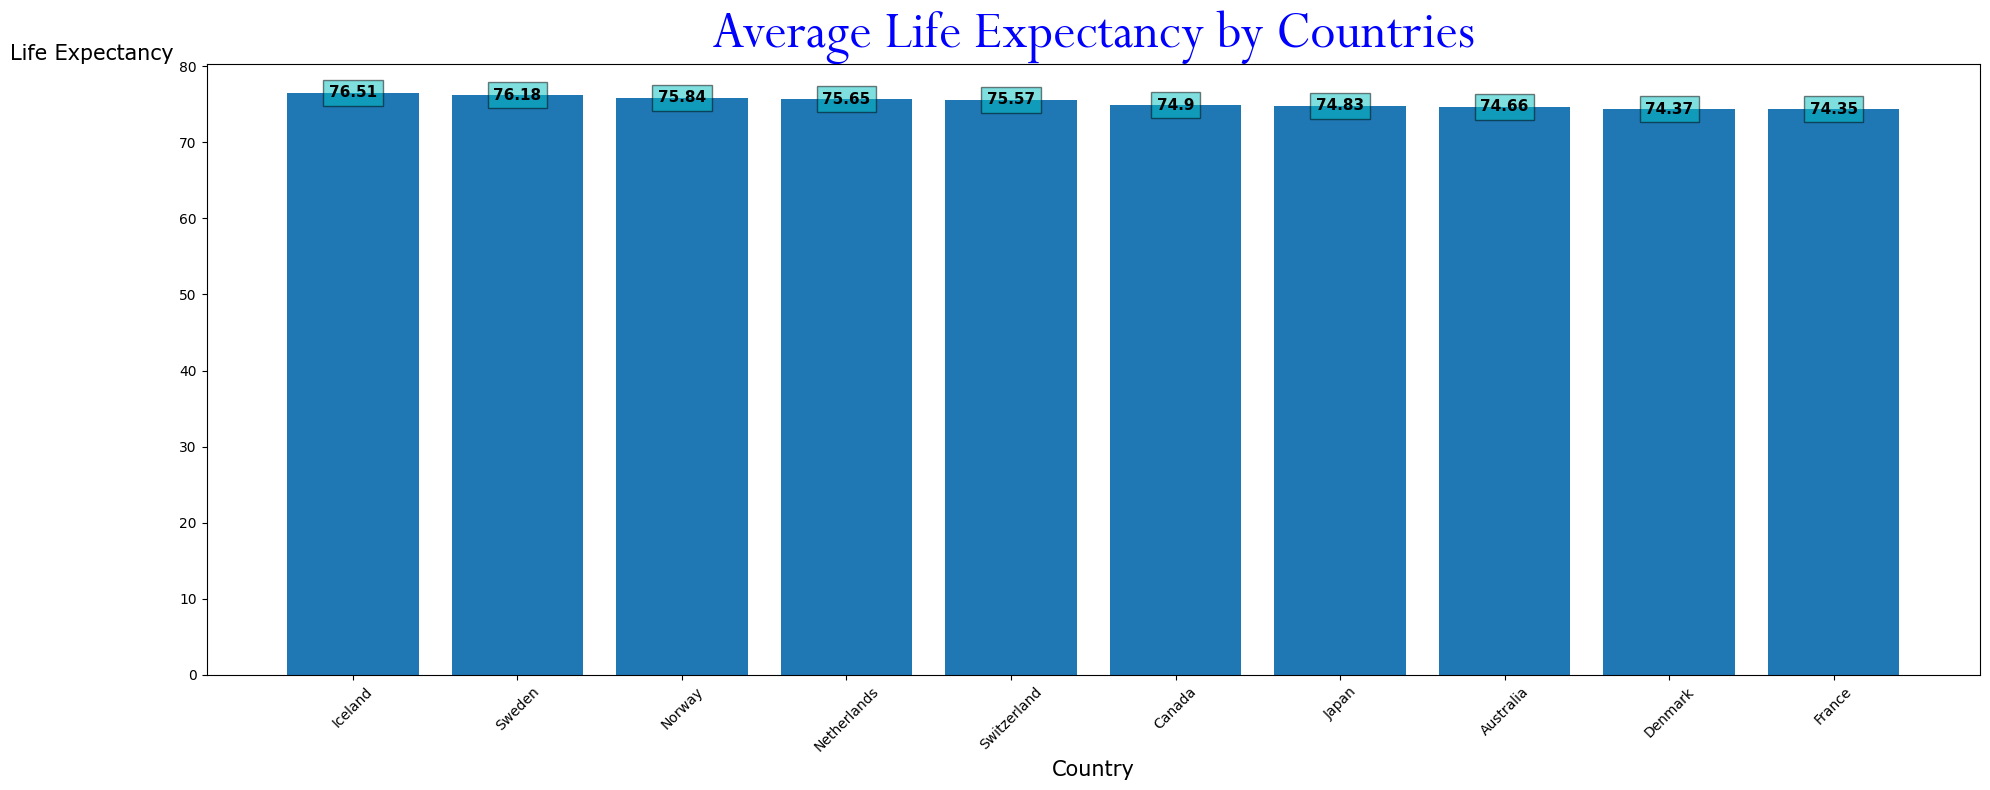

In [52]:

# BAR CHART DATA PREP
bar_data = df.groupby("country", as_index= False)["lifeExp"].mean().sort_values(by="lifeExp", ascending= False)

x = bar_data.nlargest(10, 'lifeExp', keep='first').sort_values(by='lifeExp', ascending=False)['country']
y = bar_data.nlargest(10, 'lifeExp', keep='first').sort_values(by='lifeExp', ascending=False)['lifeExp'].round(decimals = 2)



# SET THE SIZE FOR THE GRAPH
plt.figure(figsize=(20, 8))


# TITLE FOR THE GRAPH
plt.title("Average Life Expectancy by Countries",
          fontdict = font10_,
          loc='center'
          )


# X AXIS LABEL  (use rotation and loc to customize axis labels)
plt.xlabel("Country", fontdict= font2, fontsize=15)


# Y AXIS LABEL  (use rotation and loc to customize axis labels)
plt.ylabel("Life Expectancy",
           loc="top",
           rotation='horizontal',
           fontdict= font2,
           fontsize=15
           )


# ASSIGN A COLOR MAP
#my_cmap = plt.cm.get_cmap('RdYlGn', 10)



# USE XTICKS FOR OVERLAPPING LABELS
plt.xticks(rotation = 45)


# INITIATE THE CHART. use the colormap with this code
plt.bar(x, y )



# TO SHOW DATA LABELS ON THE GRAPH. PLACE IT AFTER plt.bar()
for x, y in enumerate(y):
    plt.text(x, y,
             str(y),
             fontsize=11,
             bbox=dict(facecolor='c', alpha=0.5),
             fontweight="bold",
             ha='center',
             va='center'
             )

# TIGHT LAYOUT (optional)
plt.tight_layout()


# SHOW THE CHART
plt.show()

# one of the default formal chart style :  plt.style.use("fivethirtyeight")



 ### 3) LINE CHART


> YOU CAN USE THESE MARKERS ON THE LINE CHART

| Marker Description | Example        |
|--------------------|----------------|
| 'o'                | Circle         |
| '*'                | Star           |
| '.'                | Point          |
| ','                | Pixel          |
| 'x'                | X              |
| 'X'                | X (filled)     |
| '+'                | Plus           |
| 'P'                | Plus (filled)  |
| 's'                | Square         |
| 'D'                | Diamond        |
| 'd'                | Diamond (thin) |
| 'p'                | Pentagon       |
| 'H'                | Hexagon        |
| 'h'                | Hexagon        |
| 'v'                | Triangle Down  |
| '^'                | Triangle Up    |
| '<'                | Triangle Left  |
| '>'                | Triangle Right |
| '1'                | Tri Down       |
| '2'                | Tri Up         |
| '3'                | Tri Left       |
| '4'                | Tri Right      |
| '\|'               | Vline          |
| '_'                | Hline          |


> YOU CAN USE THESE LINE SHAPES


| LINE SHAPE         | DEFINITION     |
|--------------------|----------------|
| '-'                | SOLID LINE     |
| ':'                | DOTTED LINE    |
| '--'               | DASHED LINE    |
| '-.'               | DASH/DOT LINE  |



<br>

>  You can use also use the shortcut string notation parameter to specify the marker.
This parameter is also called fmt, and is written with this syntax: marker|line|color


| Color Syntax | Example        |
|--------------|----------------|
| 'r'          | Red            |
| 'g'          | Green          |
| 'b'          | Blue           |
| 'c'          | Cyan           |
| 'm'          | Magenta        |
| 'y'          | Yellow         |
| 'k'          | Black          |
| 'w'          | White          |


[HTML COLOR NAMES](https://www.w3schools.com/colors/colors_names.asp)


> You can use the keyword argument markeredgecolor or the shorter mec to set the color of the edge of the markers:



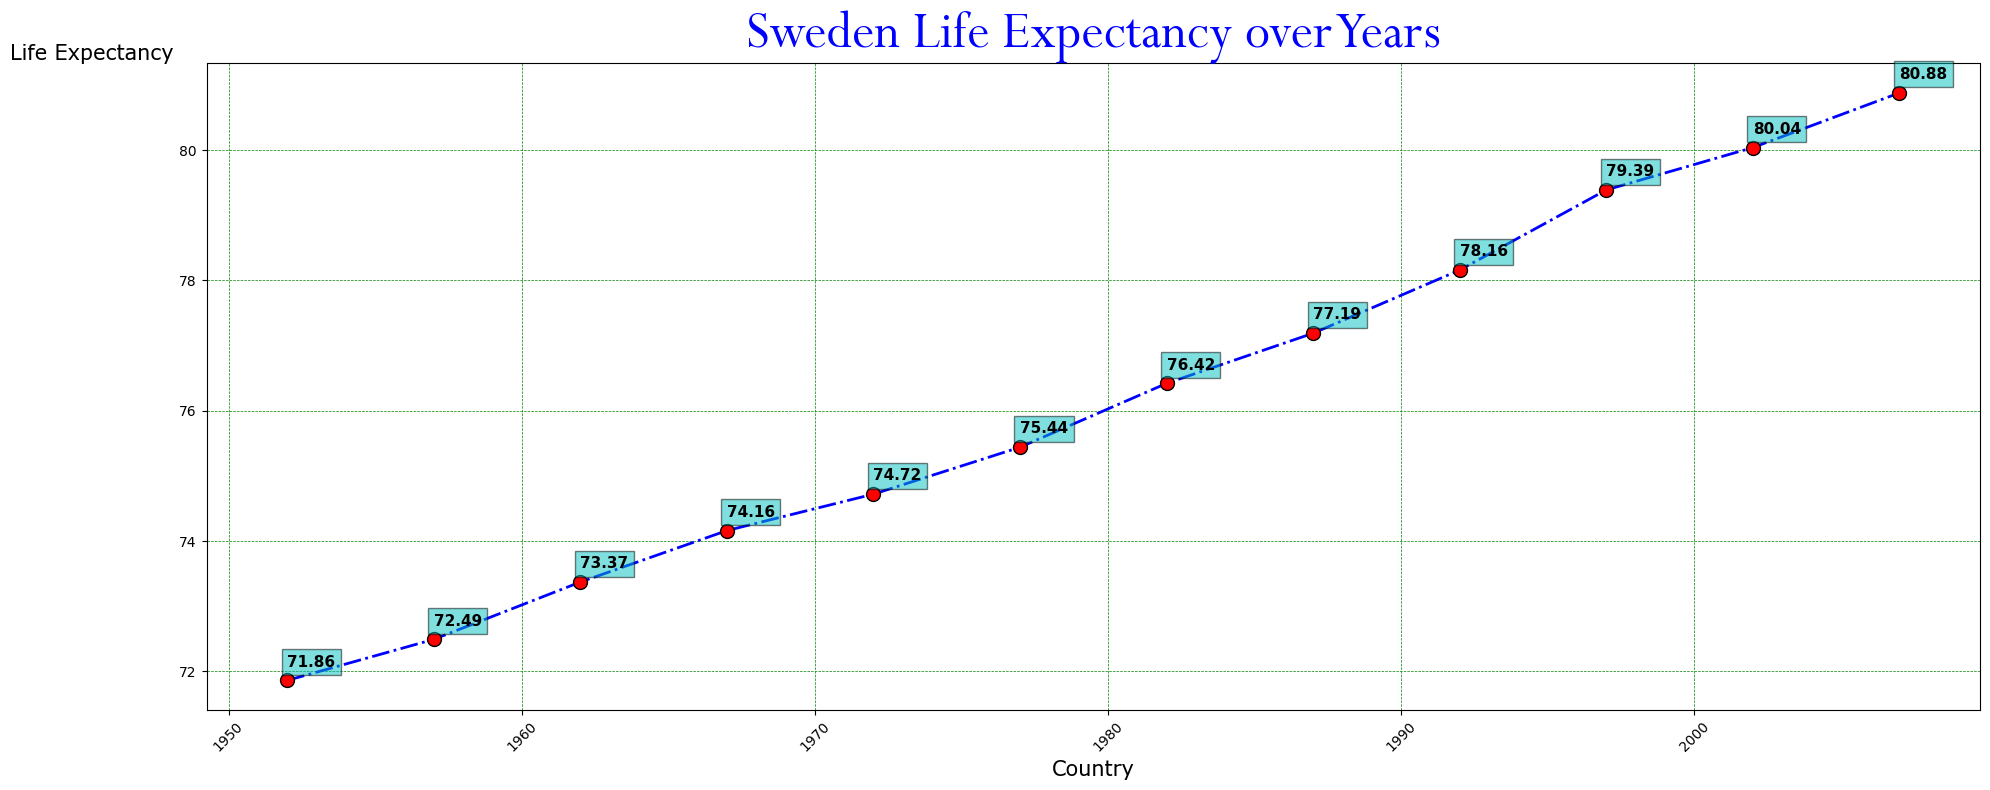

In [88]:
# LINE CHART DATA PREP
location_filter = (df["country"] == "Sweden")
df = df[location_filter]

line_data = df[["country", "year", "lifeExp"]]

x = line_data['year']
y = line_data['lifeExp'].round(decimals = 2)



# SET THE SIZE FOR THE GRAPH
plt.figure(figsize=(20, 8))


# TITLE FOR THE GRAPH
plt.title("Sweden Life Expectancy over Years",
          fontdict = font10_,
          loc='center'
          )


# X AXIS LABEL  (use rotation and loc to customize axis labels)
plt.xlabel("Country", fontdict= font2, fontsize=15)


# Y AXIS LABEL  (use rotation and loc to customize axis labels)
plt.ylabel("Life Expectancy",
           loc="top",
           rotation='horizontal',
           fontdict= font2,
           fontsize=15
           )


# ASSIGN A COLOR MAP
#my_cmap = plt.cm.get_cmap('RdYlGn', 10)



# USE XTICKS FOR OVERLAPPING LABELS
plt.xticks(rotation = 45)


# CUSTOMIZE THE GRID
plt.grid(color = 'green', linestyle='--', linewidth = 0.5)


# INITIATE THE CHART. use the colormap with this code

# coordinates, marker - line style - line color, marker edge color, markerfacecolor, marker size, line width
plt.plot(x, y, 'o-.b',
         mec= 'k',
         mfc= 'r',
         ms= 10,
         lw= 2 
         )

# TO SHOW DATA LABELS ON THE GRAPH.  Place it after plt.plot()
for x,y in zip(x,y):
    plt.annotate(str(y),
                 xy=(x, y),
                 xytext=(0, 10),
                 textcoords='offset points',
                 fontsize=11,
                 bbox=dict(facecolor='c', alpha=0.5),
                 fontweight="bold")


# TIGHT LAYOUT (optional)
plt.tight_layout()


# SHOW THE CHART
plt.show()

# TO SAVE THE FIGURE:  plt.savefig('plot.png')
# if you have more than 1 line, use label inside each of the plt.plot( label='Python' ) function to clarify the legend.



 ### 4) PIE CHART

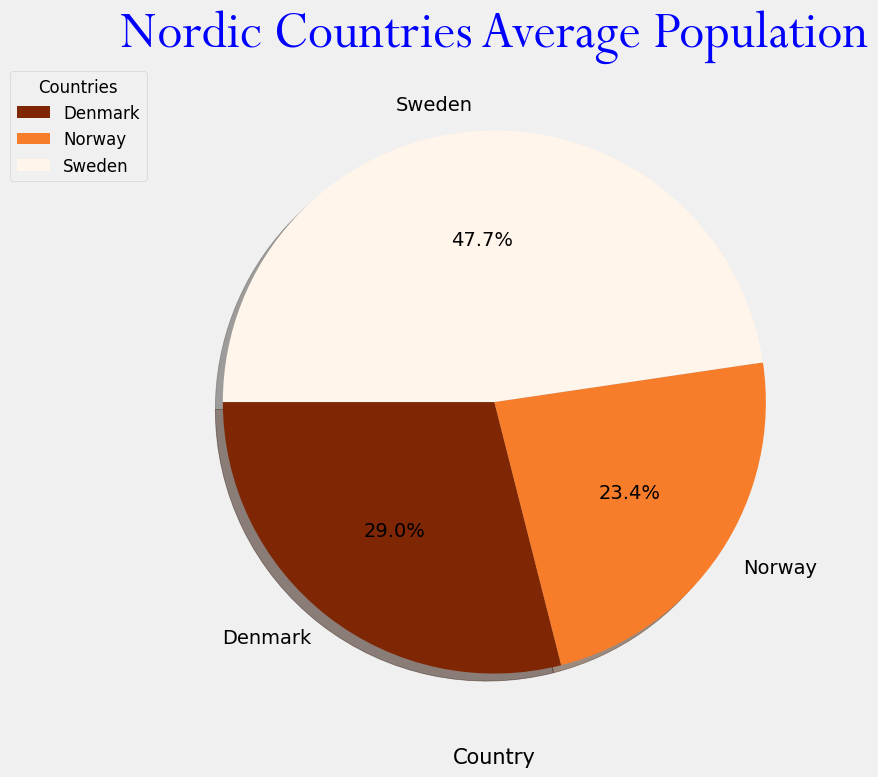

In [103]:
# PIE CHART DATA PREP
location_filter = (df["country"].isin(["Sweden", "Norway", "Denmark"]))
df = df[location_filter]

line_data = df.groupby("country", as_index= False)["pop"].mean()

x = line_data['country']
y = line_data['pop'].round(decimals = 2)



# SET THE SIZE FOR THE GRAPH
plt.figure(figsize=(30, 8))


# TITLE FOR THE GRAPH
plt.title("Nordic Countries Average Population",
          fontdict = font10_,
          loc='center'
          )


# X AXIS LABEL  (use rotation and loc to customize axis labels)
plt.xlabel("Country", fontdict= font2, fontsize=15)



# TO USE CUSTOM STYLE
plt.style.use("fivethirtyeight")


# CREATE AN ARRAY TO MAKE ONE CATEGORY STAND OUT
#myexplode = ([0, 0.2, 0, 0])


# ASSIGN COLORMAP
colormap = plt.cm.get_cmap('Oranges', 10)
numberOfSlices = len(y)
sliceColors = colormap(np.linspace(1., 0., numberOfSlices))


# INITIATE THE CHART
plt.pie(y,
        labels=x,
        startangle=180,
        # explode=myexplode,
        shadow=True,
        radius=1,
        autopct='%.1f%%',
        colors=sliceColors,
        textprops={'fontsize': 14}
        )

# startangle to decide wedge
# radius for the size
# autopct for percentage of the wedges
# textprops to change the fontsize


# CHANGE THE LEGEND LOCATION
plt.legend(
    bbox_to_anchor=(0, 1),
    title = 'Countries',
    title_fontsize = 12,
    fontsize = 12)


# TIGHT LAYOUT (optional)
plt.tight_layout()


# SHOW THE CHART
plt.show()




















 ### 5) SCATTER PLOT

 ### 6) HISTOGRAM